In [4]:
!pip install hvplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [5]:
## Importing Data
df=pd.read_csv("./tb2/IBM.csv")

In [6]:
# Top 5 Rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
## Display all column names
names = df.columns.values 
print(names)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [8]:
df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [9]:
y = df['Attrition']

# Exploratory Data Analysis

In [10]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of unique values 2
RelationshipSatisfaction: Number of unique values 4
StockOptionLev

In [11]:
df.drop(['EmployeeCount'], axis="columns", inplace=True)

In [12]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [13]:
len(object_col)

7

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [15]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [16]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


## Confusion Matrix

C:\Users\indah\AppData\Local\Temp\ipykernel_2376\1625585791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


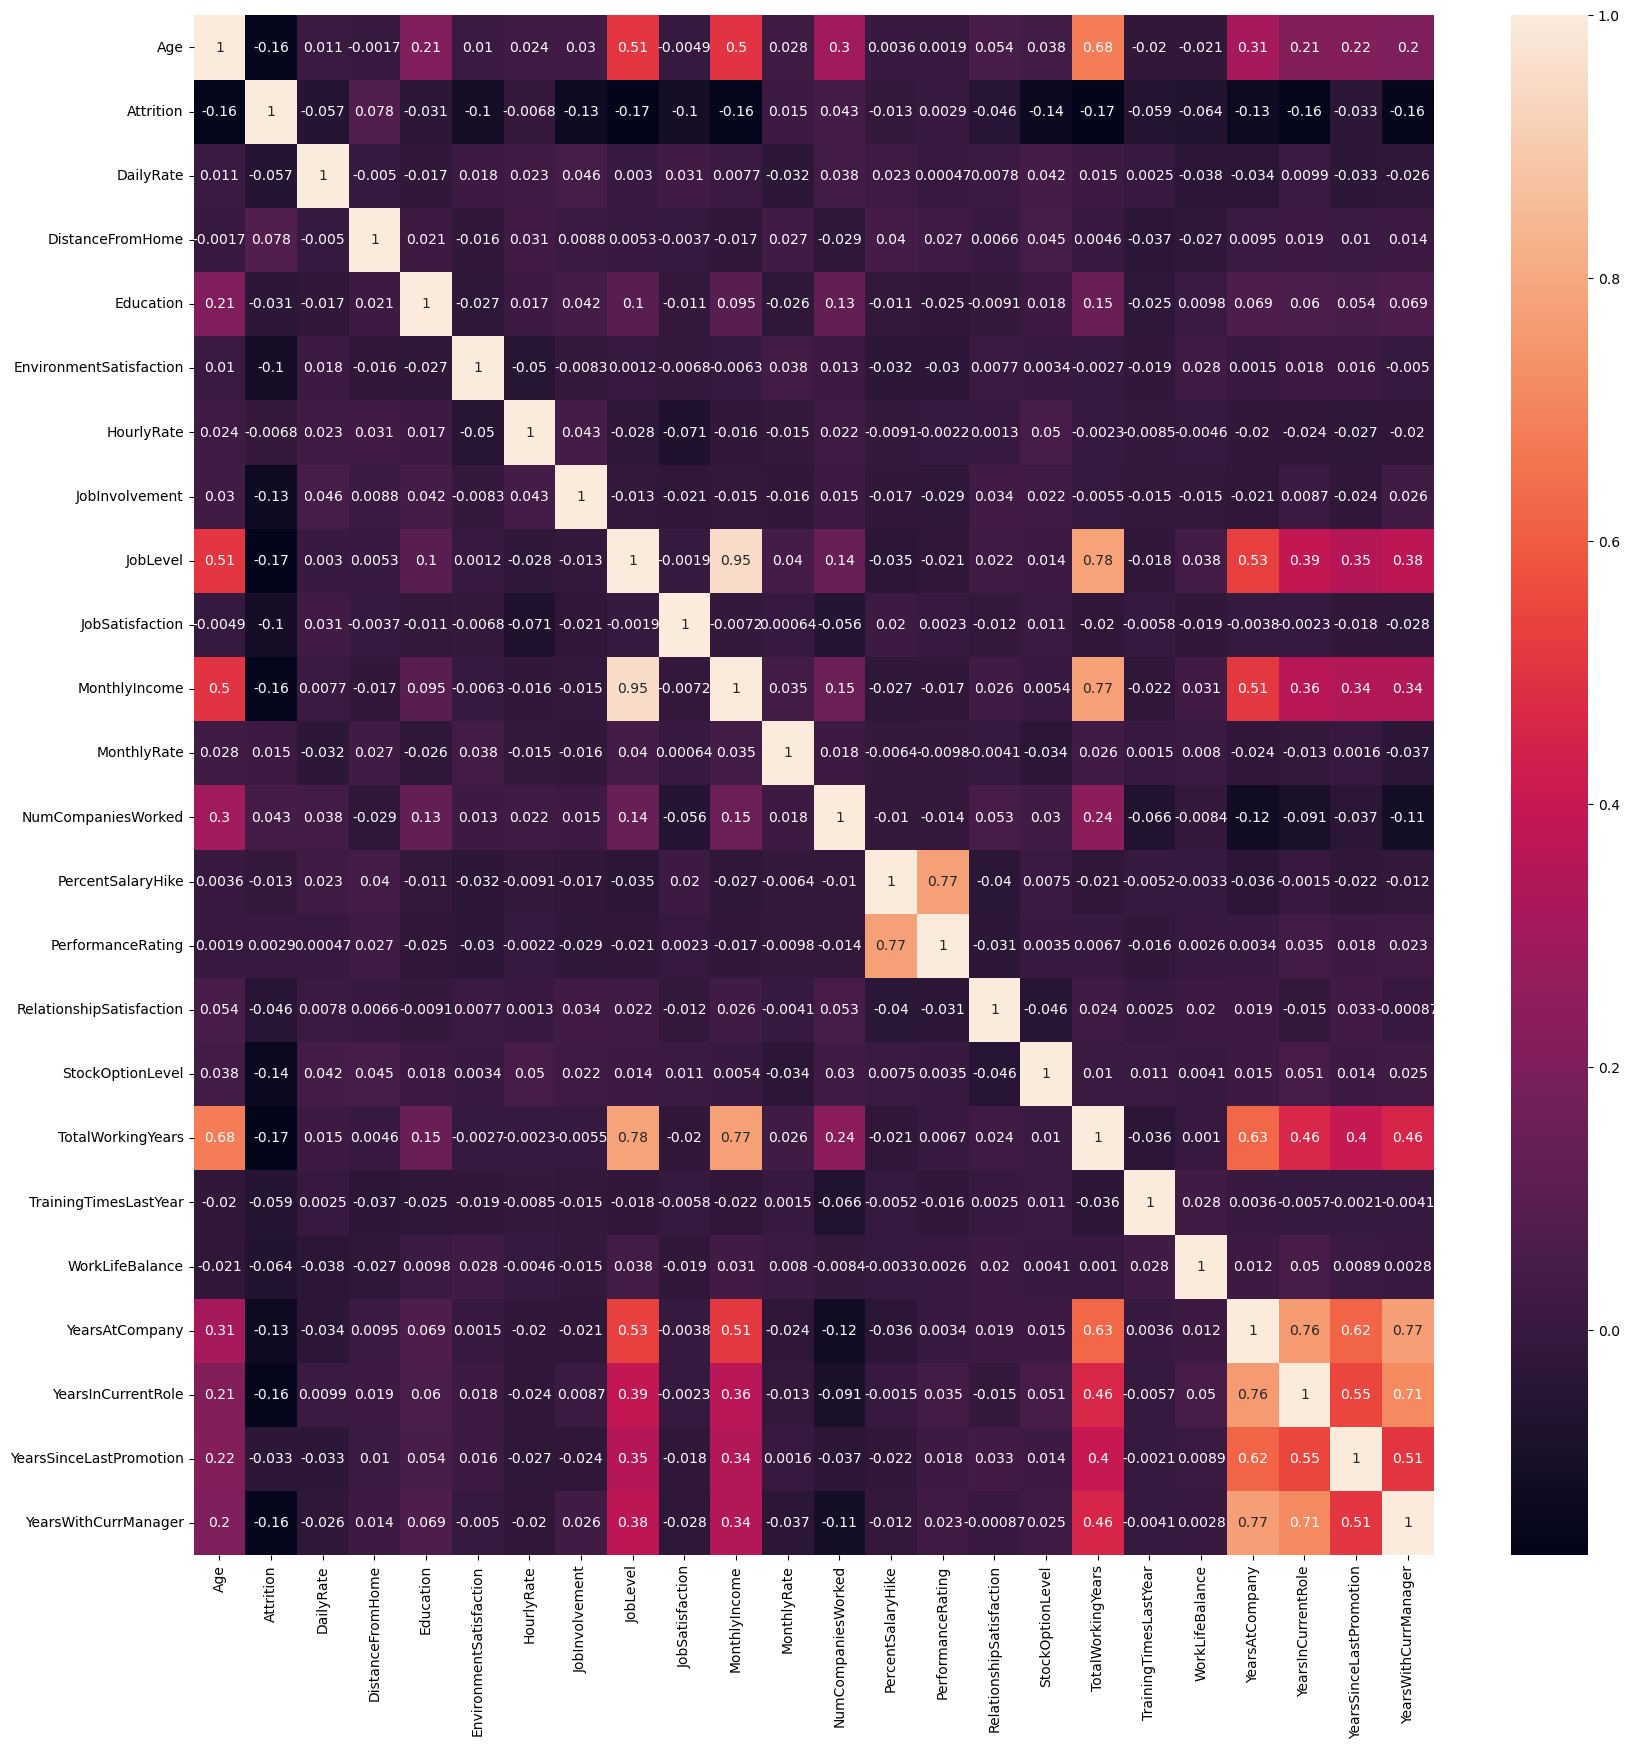

In [17]:
plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True)
plt.show()

C:\Users\indah\AppData\Local\Temp\ipykernel_2376\1184053150.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('Attrition', axis=1).corrwith(df.Attrition).plot(kind='barh', figsize=(15,10))


<Axes: >

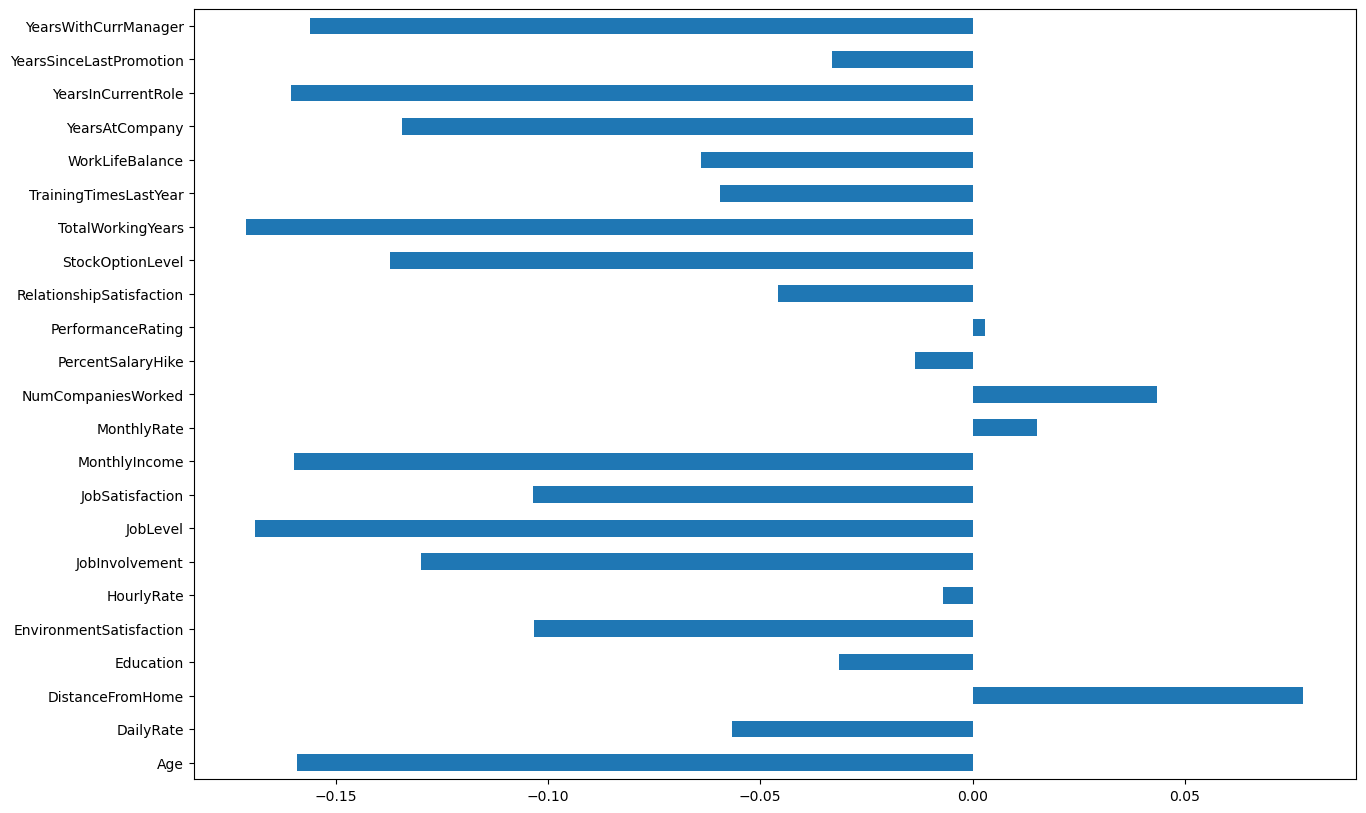

In [25]:
## C. Analisa Korelasi positif dan negatif
df.drop('Attrition', axis=1).corrwith(df.Attrition).plot(kind='barh', figsize=(15,10))

C:\Users\indah\AppData\Local\Temp\ipykernel_2376\2515870890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('Attrition', axis=1).corrwith(df.Attrition).sort_values().plot(kind='barh', figsize=(15,10))


<Axes: >

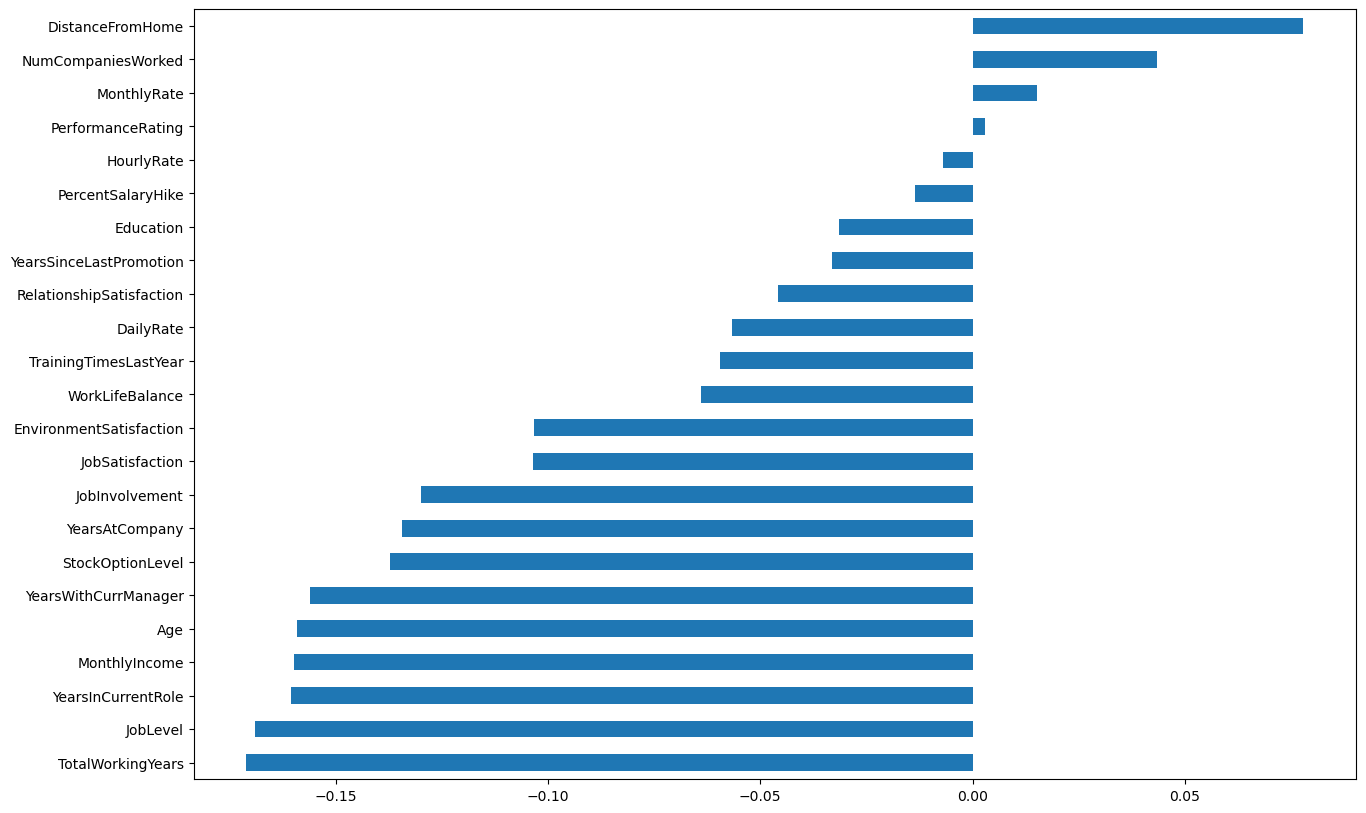

In [26]:
## D. feature Engineering implementation
df.drop('Attrition', axis=1).corrwith(df.Attrition).sort_values().plot(kind='barh', figsize=(15,10))

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=12)
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\indah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)

Coeff: [[ 2.81371234e-03 -2.73594503e-05  2.20084565e-02  4.25825864e-04
  -5.31878188e-02 -1.74631348e-03 -5.25784123e-02 -7.76006641e-03
  -8.02017727e-02 -7.59560552e-06  8.67843367e-06  1.20660221e-01
  -1.64249340e-02  1.22760104e-02 -1.76973932e-02 -8.28891278e-02
  -8.44688265e-02 -3.70475155e-02 -2.36360676e-02  6.26443266e-03
  -9.30169450e-02  1.25127741e-01 -1.09762518e-01 -1.93837803e-02
   3.85129978e-02 -1.55960554e-02  3.50859211e-03 -3.88582390e-02
   3.88828090e-02  5.56818783e-03 -6.70122036e-03  1.74370642e-02
  -2.64041642e-02 -1.46355171e-03  1.50968464e-02 -1.06813850e-02
   1.42145471e-02 -1.41692939e-02  4.28055988e-03  1.18759411e-02
   1.31708986e-03 -1.35128462e-02 -2.30655906e-03 -2.10295811e-02
   1.44814177e-02  2.25964339e-02 -2.43269356e-02 -2.30948375e-02
   5.09549352e-02 -8.28960311e-02  8.64291931e-02]]
Intercept: [0.00353319]


In [31]:
## E. Feature engineering
stay = (Y_train.value_counts()[0] / Y_train.shape)[0]
leave = (Y_train.value_counts()[1] / Y_train.shape)[0]

In [34]:
Y_test.value_counts()[0] / Y_test.shape[0]

0.8390022675736961

In [33]:
print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (Y_test.value_counts()[0] / Y_test.shape)[0]
leave = (Y_test.value_counts()[1] / Y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.90%
Leaving Rate: 16.10%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [38]:
## F. Cross Validation
from sklearn.neighbors import KNeighborsClassifierz
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, Y_train)

# Predict the labels of the test data: y_pred
Y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[367   3]
 [ 65   6]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.67      0.08      0.15        71

    accuracy                           0.85       441
   macro avg       0.76      0.54      0.53       441
weighted avg       0.82      0.85      0.79       441



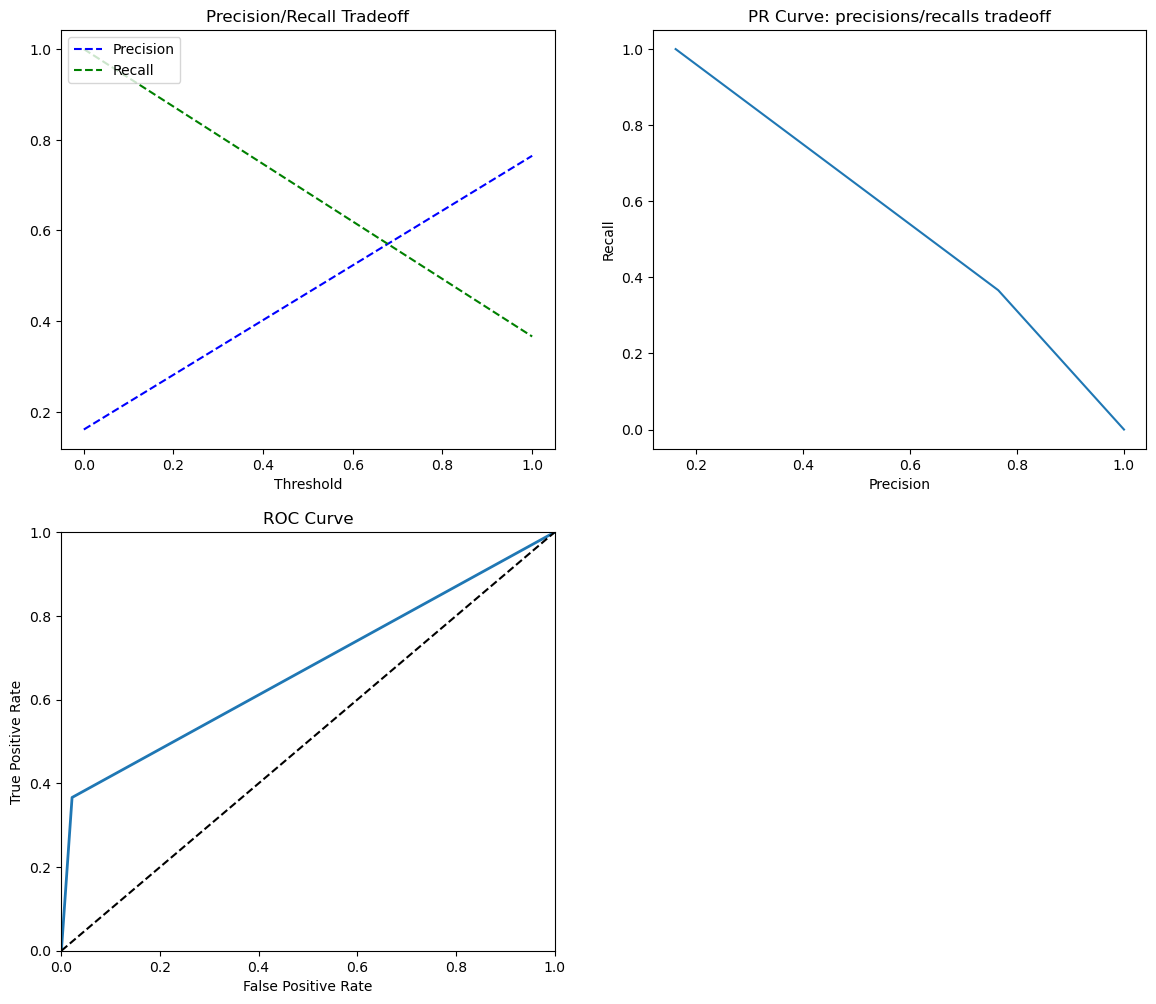

In [39]:
##g. plot_precision_recall vs threshold, plot roc_curve, dan tentukan nilai roc_auc_score

from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


precisions, recalls, thresholds = precision_recall_curve(Y_test, lr_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(Y_test, lr_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [41]:
Y_pred_proba = model.predict_proba(X_test)[:, 1]

In [42]:
# Menghitung nilai roc_auc_score
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.7680624286258089
